Observations
1. The Average Salary is flat comparing different positions in the company
2. The company has 443,308 employees with senior level titles.
3. There are only 7 positions in the company

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

#Manual entry password for pgAmin that is hidden
from config import password

········


In [2]:
# follows django database settings format, replace with your own settings
DATABASES = {
    'production':{
        'NAME': 'EmployeeSQL',
        'USER': 'postgres',
        'PASSWORD': password,
        'HOST': 'localhost',
        'PORT': 5432,
    },
}
#'USER': 'user',
# choose the database to use
db = DATABASES['production']

# construct an engine connection string
engine_string = "postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}".format(
    user = db['USER'],
    password = db['PASSWORD'],
    host = db['HOST'],
    port = db['PORT'],
    database = db['NAME'],
)

# create sqlalchemy engine
engine = create_engine(engine_string)

# read a table from database into pandas dataframe, replace "tablename" with your table name
employees_df = pd.read_sql_table('employees',engine)
departments_df = pd.read_sql_table('departments',engine)
dept_emp_df = pd.read_sql_table('dept_emp',engine)
dept_manager_df = pd.read_sql_table('dept_manager',engine)
salaries_df = pd.read_sql_table('salaries',engine)
titles_df = pd.read_sql_table('titles',engine)

In [3]:
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


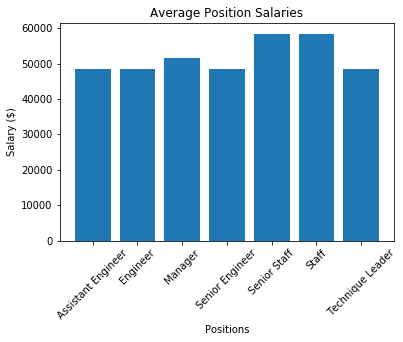

In [4]:
titles_salaries = pd.merge(salaries_df,titles_df, on = 'emp_no', how = 'inner')
titles_salaries.head()
t = titles_salaries.groupby('title').mean()
t = t.drop(['emp_no'], axis = 1)
t = t.reset_index()
plt.bar(t.title,t.salary)
plt.title("Average Position Salaries")
plt.ylabel("Salary ($)")
plt.xlabel("Positions")
plt.xticks(rotation =45)
plt.savefig("Average Title Salaries.png")
plt.show()

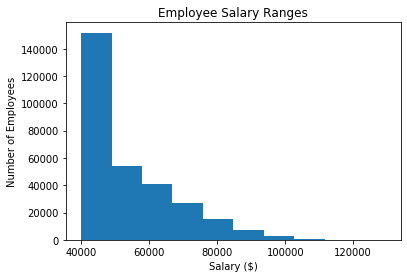

In [5]:
plt.hist(salaries_df['salary'])
plt.title("Employee Salary Ranges")
plt.ylabel("Number of Employees")
plt.xlabel("Salary ($)")
plt.savefig("Employee_Salary_Hist.png")
plt.show()